In [35]:
import pandas as pd
import numpy as np
import base64

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

# Data Acquistion
Download dataset from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv) and store it under **data** directory.

> Time: Number of seconds elapsed between this transaction and the first transaction in the dataset<BR>
> V1-V26: Protected user identities and sensitive features(v1-v28)<BR>
> Amount: Transaction amount<BR>
> Class : 1 for fraudulent transactions, 0 otherwise<BR>

## Data Download

In [26]:
cc_df = pd.read_csv("../../data/creditcard.csv")

## Data Understanding

In [27]:
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


V1-V28 seem to be already scaled or normalized. So later, we will scale Time and Amount features only.

In [28]:
print(f"There are {cc_df.shape[0]} rows and {cc_df.shape[1]} features")

There are 284807 rows and 31 features


In [32]:
if df_cc.isna().sum().sum() == 0:
    print("There are no null data in the dataset")
else:
    print("There are null data in the dataset")

There are no null data in the dataset


<AxesSubplot:>

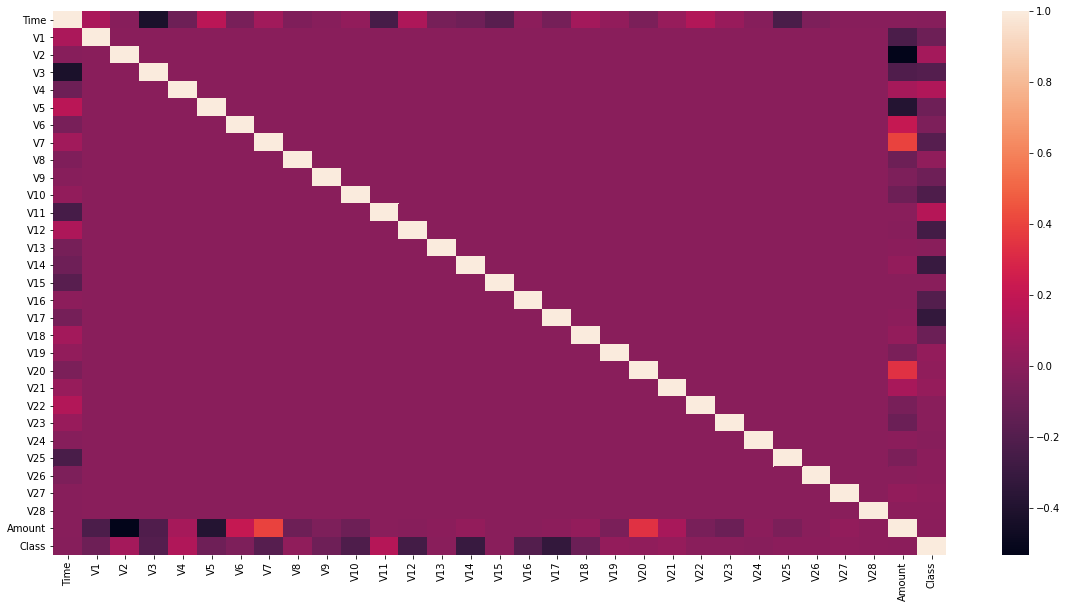

In [38]:
fig, ax = plt.subplots(figsize=(20,10))         

sns.heatmap(cc_df.corr())

Check target class imbalance

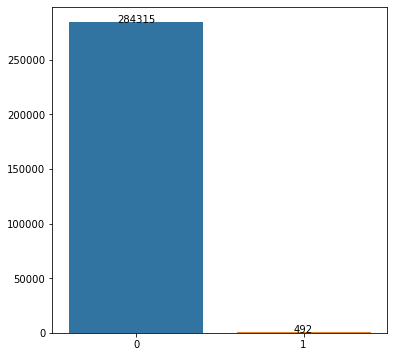

In [76]:
fig, ax = plt.subplots(figsize=(6,6)) 
labels=cc_df['Class'].value_counts().index
values=cc_df['Class'].value_counts().values

ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")


Target class is highly imalanced. We will use oversampling technique later to account for the imalance.

In [68]:
print(f"Number of non-fraudulant transactions {cc_df['Class'].value_counts()[0]}")
print(f"Number of fraudulant transactions {cc_df['Class'].value_counts()[1]}")

Number of non-fraudulant transactions 284315
Number of fraudulant transactions 492


## Data Preparation

### Under Sampling

In [83]:
# Prepare for random selection
shuffled_df = cc_df.sample(frac=1,random_state=42)

# Store ALL fraudulant observations separately.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

#Randomly select 492 non-fraudulant observations out of 284,313 observations
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)
normalized_df = pd.concat([fraud_df, non_fraud_df])

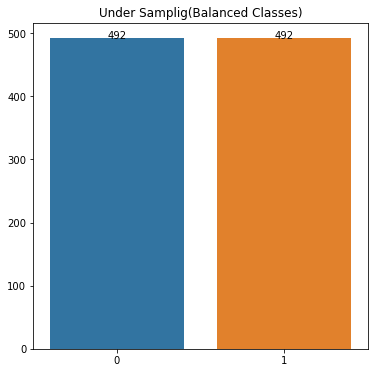

In [85]:
fig, ax = plt.subplots(figsize=(6,6)) 
labels=underSample_df['Class'].value_counts().index
values=underSample_df['Class'].value_counts().values

ax = sns.barplot(x=labels, y=values)
plt.title('Under Samplig(Balanced Classes)')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

### Over Sampling

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

os_train_X, os_train_y = smote.fit_sample(cc_df.drop('Class', axis=1), cc_df['Class'])
os_train = pd.concat([pd.DataFrame(os_train_y), pd.DataFrame(os_train_X)], axis=1)
os_train.columns = normalized_df.columns

In [ ]:
# Warning: This cell will take time to run
fig, ax = plt.subplots(figsize=(6,6)) 
labels=os_train['Class'].value_counts().index
values=os_train['Class'].value_counts().values

ax = sns.barplot(x=labels, y=values)
plt.title('Over Sampling(Balanced Classes)')
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")